In [2]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box
import matplotlib.pyplot as plt

In [3]:
inDir = '/mnt/d/Users/abolmaal/Arcgis/NASAOceanProject/GIS_layer/pourpoints'

StreamPlume = os.path.join(inDir, 'StreamwatershedPlumes_NAD1983_buffer.shp')

In [4]:
# read the shapefile
StreamPlume = gpd.read_file(StreamPlume)

StreamPlume

,Id,gridcode,Shape_Leng,Shape_Area,Group_id,plume_dist,geometry
0,354,17747,29150.672372,2.608193e+07,0,635.3,"POLYGON ((979244.66 1014646.105, 979229.352 10..."
1,359,17741,45675.961010,6.915027e+07,1,1417.2,"POLYGON ((990542.043 1004411.475, 990499.826 1..."
2,360,26421,98174.173783,1.703711e+08,2,NaN,"POLYGON ((966433.062 1011227.105, 966389.675 1..."
3,363,17746,60372.523226,9.425426e+07,3,1147.0,"POLYGON ((1018266.405 992233.702, 1018187.735 ..."
4,366,17757,35160.158114,3.772995e+07,4,1173.9,"POLYGON ((1041102.716 981281.89, 1041089.824 9..."
...,...,...,...,...,...,...,...
176,829,28211,347.645545,3.169744e+03,172,NaN,"POLYGON ((1137052.059 669887.007, 1137013.57 6..."
177,830,28211,28204.283448,1.396735e+07,173,NaN,"POLYGON ((1130276.899 669390.145, 1130167.323 ..."
178,831,28161,14168.945487,7.877722e+06,174,NaN,"POLYGON ((1130276.899 669390.145, 1130374.011 ..."
179,846,28349,113.152246,6.158370e+02,175,NaN,"POLYGON ((1115084.931 653576.187, 1115120.233 ..."


In [5]:
# remove the column that plum_dist is equal to NaN
StreamPlume = StreamPlume[StreamPlume['plume_dist'].notna()]


In [9]:
#average plume distance
StreamPlume['plume_dist'] = StreamPlume['plume_dist'].astype(float)
average_plume_distance = StreamPlume['plume_dist'].mean()
print(f"Average plume distance: {average_plume_distance}")

Average plume distance: 1966.4572


/root/miniforge3/envs/pylag/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


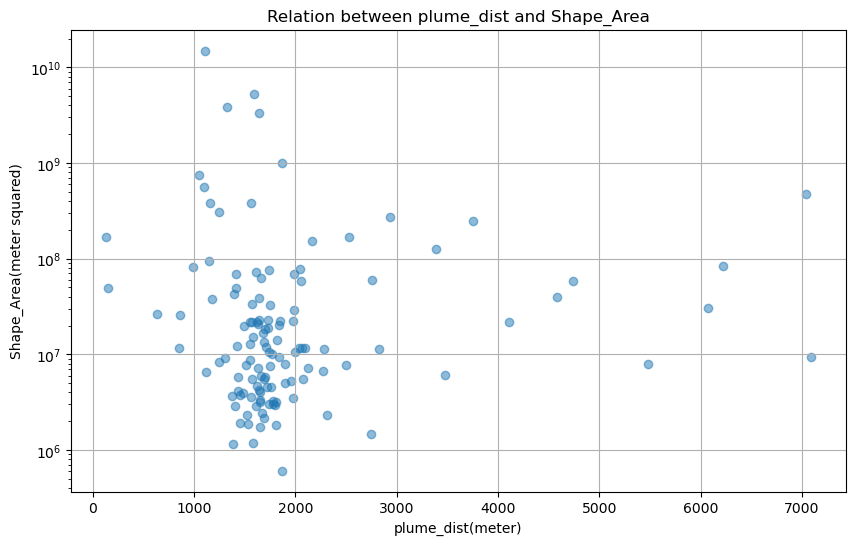

In [23]:
# plot a relation plot that shows the relation between plume_dist and Shape_Area
plt.figure(figsize=(10, 6))
plt.scatter(StreamPlume['plume_dist'], StreamPlume['Shape_Area'], alpha=0.5)
plt.title('Relation between plume_dist and Shape_Area')
plt.xlabel('plume_dist(meter)')
plt.ylabel('Shape_Area(meter squared)')
plt.yscale('log')
# plt.xlim(0, 3000)
# plt.ylim(0, 4000000000)
plt.grid(True)
plt.savefig('plume_distance_vs_shape_area.png', dpi=300)
plt.show()

In [24]:
# select the column the Groupp_id =23,25,27,29,33,35,36,38,40,41,46,57,58,62,63,64,65,70,75,83,85,88,89,92,112,117,118,131,162
StreamPlume_thumb = StreamPlume[StreamPlume['Group_id'].isin([23, 25, 27, 29, 33, 35, 36, 38, 40, 41, 46, 57, 58, 62, 63, 64, 65, 70, 75, 83, 85, 88, 89, 92, 112, 117, 118, 131, 162])]

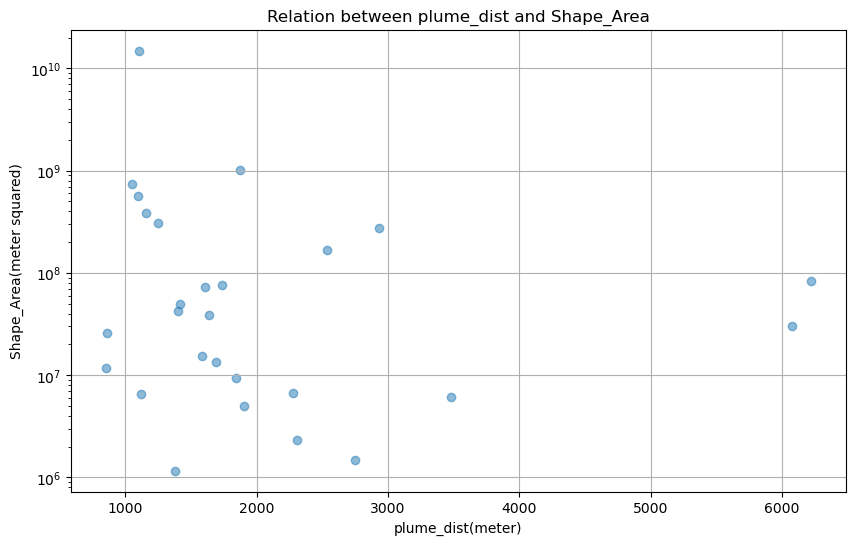

In [25]:
# plot the relation plot that shows the relation between plume_dist and Shape_Area
plt.figure(figsize=(10, 6))
plt.scatter(StreamPlume_thumb['plume_dist'], StreamPlume_thumb['Shape_Area'], alpha=0.5)
plt.title('Relation between plume_dist and Shape_Area')
plt.xlabel('plume_dist(meter)')
plt.ylabel('Shape_Area(meter squared)')

plt.yscale('log')
plt.grid(True)
plt.show()

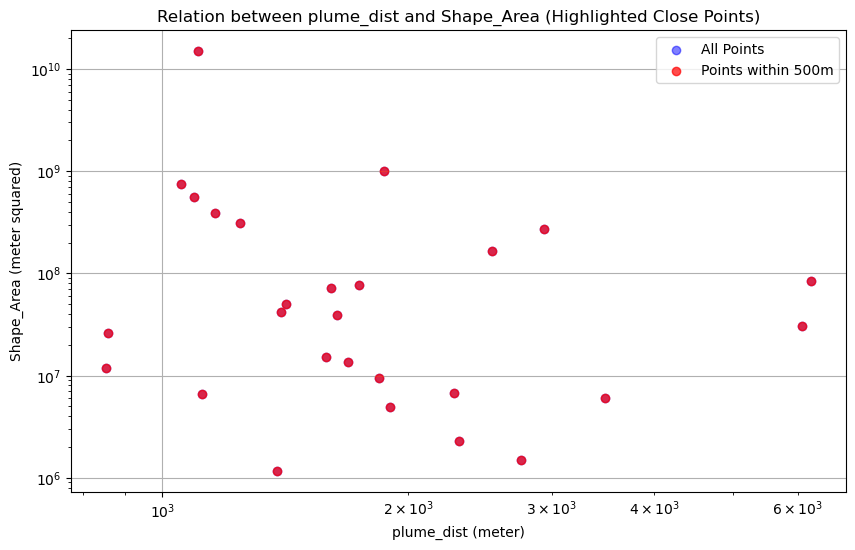

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Calculate the pairwise Euclidean distances between all points in 'plume_dist' and 'Shape_Area'
coords = StreamPlume_thumb[['plume_dist', 'Shape_Area']].values
dist_matrix = cdist(coords, coords)

# Find indices where the distance is less than 500 meters
close_points = np.where(dist_matrix >= 200)

# We want to avoid highlighting points with themselves, so exclude the diagonal
close_points = [(i, j) for i, j in zip(*close_points) if i != j]

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot for all points (in a default color)
plt.scatter(StreamPlume_thumb['plume_dist'], StreamPlume_thumb['Shape_Area'], alpha=0.5, color='blue', label='All Points',zorder=1)

# Create a set to track which points have already been highlighted to avoid duplication
highlighted_points = set()

# Highlight the points that are close to each other (within 500 meters)
for i, j in close_points:
    # Add the points to the highlighted set
    highlighted_points.add(i)
    highlighted_points.add(j)

# Scatter plot for the highlighted points (closer than 500m), using a different color (e.g., red)
highlighted_points = list(highlighted_points)
plt.scatter(StreamPlume_thumb['plume_dist'].iloc[highlighted_points], 
            StreamPlume_thumb['Shape_Area'].iloc[highlighted_points], 
            color='red', alpha=0.7, label='Points within 500m',zorder=10)

# Adding title and labels
plt.title('Relation between plume_dist and Shape_Area (Highlighted Close Points)')
plt.xlabel('plume_dist (meter)')
plt.ylabel('Shape_Area (meter squared)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

# Show plot
plt.legend()
plt.show()

